In [1]:
import numpy as np
import pandas as pd
import os

print(os.listdir('../input/forest-cover-type-kernels-only'))

['train.csv.zip', 'sample_submission.csv.zip', 'sampleSubmission.csv.zip', 'test.csv.zip']


In [2]:
!unzip '../input/forest-cover-type-kernels-only/train.csv.zip'
!unzip '../input/forest-cover-type-kernels-only/test.csv.zip'

Archive:  ../input/forest-cover-type-kernels-only/train.csv.zip
  inflating: train.csv               
Archive:  ../input/forest-cover-type-kernels-only/test.csv.zip
  inflating: test.csv                


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
print('The shape of tran: {}'.format(np.shape(train)))

The shape of tran: (15120, 56)


In [5]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
train.isnull().any().any()

False

(56, 56)


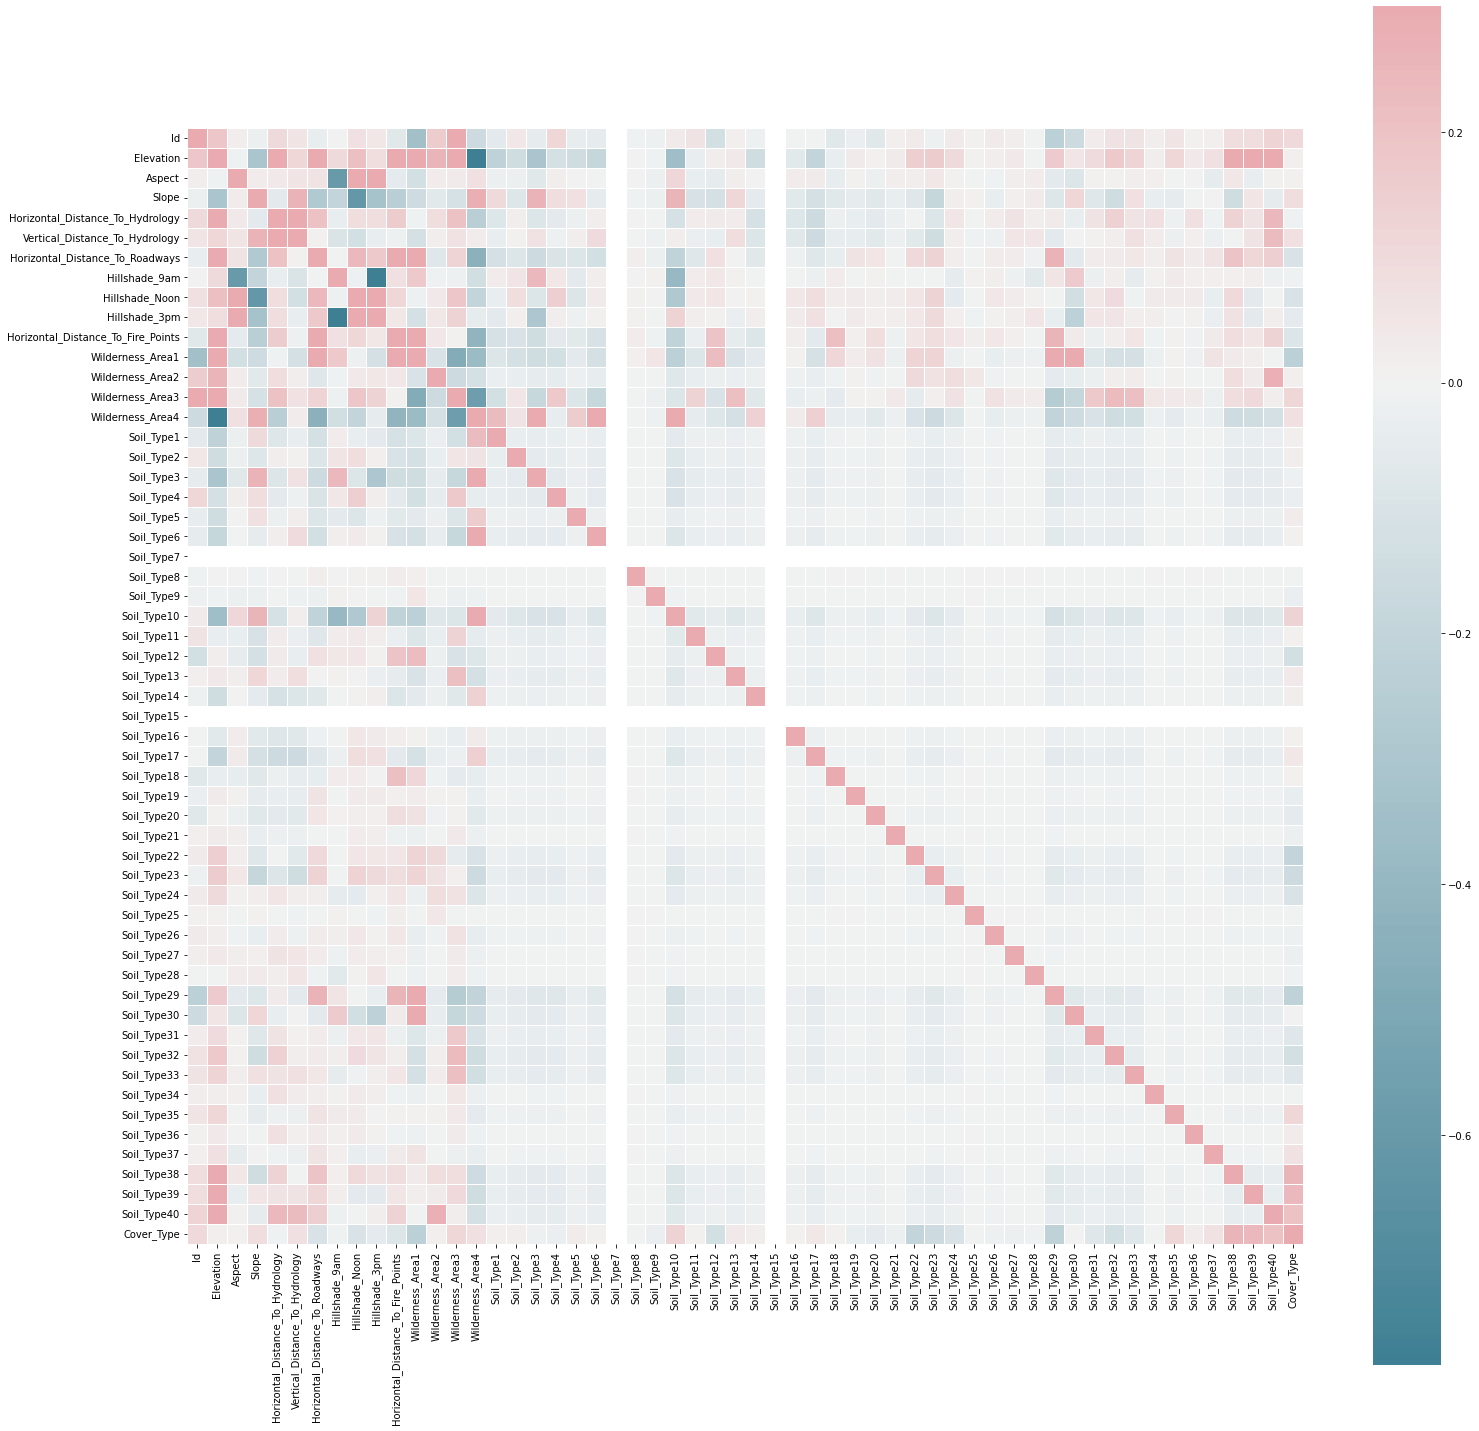

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train.corr()
fig, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=0.3, center=0, linewidths=0.5, square=True)
print(corr.shape)

In [8]:
train.drop(['Id'], inplace=True, axis=1)
train.drop(['Soil_Type7', 'Soil_Type15'], inplace=True, axis=1)
test.drop(['Soil_Type7', 'Soil_Type15'], inplace=True, axis=1)

In [9]:
train['HorizontalHydrology_HorizontalFire'] = train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Fire_Points']
train['Neg_HorizontalHydrology_HorizontalFire'] = train['Horizontal_Distance_To_Hydrology'] - train['Horizontal_Distance_To_Fire_Points']
train['HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

train['Neg_Elevation_Vertical'] = train['Elevation'] - train['Vertical_Distance_To_Hydrology']
train['Elevation_Vertical'] = train['Elevation'] + train['Vertical_Distance_To_Hydrology']

train['mean_hillshade'] =  (train['Hillshade_9am']  + train['Hillshade_Noon'] + train['Hillshade_3pm'] ) / 3

train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2

train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2

train['Slope2'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)
train['Mean_Fire_Hydrology_Roadways']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']) / 3
train['Mean_Fire_Hyd']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology']) / 2 

train["Vertical_Distance_To_Hydrology"] = abs(train['Vertical_Distance_To_Hydrology'])

train['Neg_EHyd'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2


test['HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])
test['Neg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

test['Neg_Elevation_Vertical'] = test['Elevation']-test['Vertical_Distance_To_Hydrology']
test['Elevation_Vertical'] = test['Elevation'] + test['Vertical_Distance_To_Hydrology']

test['mean_hillshade'] = (test['Hillshade_9am']  + test['Hillshade_Noon']  + test['Hillshade_3pm'] ) / 3

test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])/2
test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2

test['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2

test['Slope2'] = np.sqrt(test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)
test['Mean_Fire_Hydrology_Roadways']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways']) / 3 
test['Mean_Fire_Hyd']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology']) / 2


test['Vertical_Distance_To_Hydrology'] = abs(test["Vertical_Distance_To_Hydrology"])

test['Neg_EHyd'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2

In [10]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2596,51,3,258,0,510,221,232,148,6279,...,3268.5,384.0,3394.5,-3010.5,-126.0,2884.5,258.000000,2349.000000,3268.5,2544.4
1,2590,56,2,212,6,390,220,235,151,6225,...,3218.5,301.0,3307.5,-3006.5,-89.0,2917.5,212.084889,2275.666667,3218.5,2547.6
2,2804,139,9,268,65,3180,234,238,135,6121,...,3194.5,1724.0,4650.5,-2926.5,-1456.0,1470.5,275.769832,3189.666667,3194.5,2750.4
3,2785,155,18,242,118,3090,238,238,122,6211,...,3226.5,1666.0,4650.5,-2984.5,-1424.0,1560.5,269.235956,3181.000000,3226.5,2736.6
4,2595,45,2,153,1,391,220,234,150,6172,...,3162.5,272.0,3281.5,-3009.5,-119.0,2890.5,153.003268,2238.666667,3162.5,2564.4


In [11]:
from sklearn.model_selection import train_test_split

x = train.drop(['Cover_Type'], axis=1)
y = train['Cover_Type']
print(y.head())

x_train, x_test, y_train, y_test = train_test_split(x.values,
                                                    y.values, 
                                                    test_size=0.05, 
                                                    random_state=42)

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64


In [12]:
values, counts = np.unique(y_train, return_counts=True)
print('Number of occurances of each class in the dataset {}.'.format(dict(zip(values, counts))))

Number of occurances of each class in the dataset {1: 2047, 2: 2057, 3: 2036, 4: 2071, 5: 2048, 6: 2061, 7: 2044}.


In [13]:
pd.set_option('display.max_rows', 500)

In [14]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

dataset = datasets.load_iris()

clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)
z = clf.feature_importances_

df = pd.DataFrame()
print(len(z))
print(len(x.columns.values))

df['values'] = z
df['column'] = x.columns.values
df.sort_values(by='values', ascending=False, inplace=True, ignore_index=True)
df.head(100)

71
71


,values,column
0,0.078442,Elevation
1,0.072437,Neg_Elevation_Vertical
2,0.066005,Neg_EHyd
3,0.055280,Elevation_Vertical
4,0.038751,Wilderness_Area4
5,0.024334,Soil_Type10
6,0.023849,HorizontalFire_Points_HorizontalRoadways
7,0.023028,Neg_HorizontalHydrology_HorizontalRoadways
8,0.022415,Horizontal_Distance_To_Hydrology
9,0.022223,Mean_HorizontalHydrology_HorizontalRoadways


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.fit_transform(y_test)

In [16]:
!pip uninstall xgboost --yes

Found existing installation: xgboost 1.6.2
Uninstalling xgboost-1.6.2:
  Successfully uninstalled xgboost-1.6.2


In [17]:
!pip install xgboost==1.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 3.2 MB/s eta 0:00:00


In [18]:
!pip show xgboost

Name: xgboost
Version: 1.5.0
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy, scipy
Required-by: TPOT


In [19]:
def grid_search(classifier, param_grid):
    grid = GridSearchCV(classifier, 
                    param_grid=param_grid, 
                    cv=3, n_jobs=-1,
                    scoring='accuracy',
                    verbose=3)
    grid.fit(x_train, y_train)
    return grid

In [20]:
def randomized_search(classifier, param_grid, n_iter = 100):
    grid = RandomizedSearchCV(
                    estimator=classifier, 
                    param_distributions=param_grid, 
                    cv=3, n_jobs=-1,
                    n_iter = n_iter,
                    scoring='accuracy',
                    verbose=-1)
    grid.fit(x_train, y_train)
    return grid

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

clf1 = XGBClassifier(tree_method='gpu_hist')
n_estimators = np.linspace(start=100, stop=800, num=8, dtype=int)

param_grid = {'n_estimators': n_estimators}

tune_xgboost = False
if tune_xgboost:
    xgboost_grid = grid_search(clf1, param_grid)
    print('The best parameters are {} with a score {:.2f}'.format(xgboost_grid.best_params_, xgboost_grid.best_score_ * 100))
    print('Best estimator accuracy on test set {:.2f}'.format(xgboost_grid.best_estimator_.score(x_test, y_test) * 100))
else:
    clf1.set_params(**{'n_estimators': 300})

In [22]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [0.01, 0.1, 5, 1, 10]
}

tune_logistic_regression = False
if tune_logistic_regression:
    logistic_regression_grid = grid_search(clf2, param_grid)
    print('The best parameters are {} with a score {:.2f}'.format(logistic_regression_grid.best_params_, logistic_regression_grid.best_score_ * 100))
    print('Best estimator accuracy on test set {:.2f}'.format(logistic_regression_grid.best_estimator_.score(x_test, y_test) * 100))
else:
    clf2.set_params(**{'solver': 'liblinear', 'multi_class': 'ovr', 'C': 1, 'random_state': 0})

In [23]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

clf3 = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 150, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(start=10, stop=120, num=12, dtype=int),
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 3, 4],
}

tune_random_forest = False
if tune_random_forest:
    random_forest_grid = randomized_search(clf3, param_grid, n_iter=30)
    print('The best parameters are {} with a score {:.2f}'.format(random_forest_grid.best_params_, random_forest_grid.best_score_ * 100))
    print('Best estimator accuracy on test set {:.2f}'.format(random_forest_grid.best_estimator_.score(x_test, y_test) * 100))
else:
    clf3.set_params(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 90, 'criterion': 'gini'})

In [24]:
from lightgbm import LGBMClassifier

clf4 = LGBMClassifier()
n_estimators = np.linspace(start=500, stop=1000, num=6, dtype=int)

param_grid = {
    'n_estimators': n_estimators, 
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

tune_lightgbm = False
if tune_lightgbm:
    lightgbm_grid = grid_search(clf4, param_grid)
    print('The best parameters are {} with a score {:.2f}'.format(lightgbm_grid.best_params_, lightgbm_grid.best_score_ * 100))
    print('Best estimator accuracy on test set {:.2f}'.format(lightgbm_grid.best_estimator_.score(x_test, y_test) * 100))
else:
    clf4.set_params(**{'learning_rate': 0.1, 'n_estimators': 600})

In [25]:
clf5 = ExtraTreesClassifier()

param_grid = {
    'n_estimators': np.linspace(start=200, stop=1000, num=8, dtype=int),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(start=10, stop=120, num=12, dtype=int),
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 3, 5],
}

tune_extra_trees = False
if tune_extra_trees:
    extra_trees_grid = randomized_search(clf5, param_grid, n_iter=60)
    print('The best parameters are {} with a score {:.2f}'.format(extra_trees_grid.best_params_, extra_trees_grid.best_score_ * 100))
    print('Best estimator accuracy on test set {:.2f}'.format(extra_trees_grid.best_estimator_.score(x_test, y_test) * 100))
else:
    clf5.set_params(**{'n_estimators': 885, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 80, 'criterion': 'entropy'})

In [26]:
clf6 = ExtraTreesClassifier(**{'n_estimators': 885, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 80, 'criterion': 'entropy'})
# clf7 = RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 90, 'criterion': 'gini'})

In [27]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[
    ('xgb', clf1),
#     ('lr', clf2),
    ('rf1', clf3),
#     ('rf2', clf7),
    ('lgm', clf4),
    ('et1', clf5),
    ('et2', clf6)
], voting='hard')

In [28]:
clf = clf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,15121,2680,354,14,0,0,2684,196,214,156,...,3322.5,1342.0,4664.5,-3322.5,-1342.0,1980.5,0.0,3109.666667,3322.5,2680.0
1,15122,2683,0,13,0,0,2654,201,216,152,...,3337.5,1327.0,4664.5,-3337.5,-1327.0,2010.5,0.0,3109.666667,3337.5,2683.0
2,15123,2713,16,15,0,0,2980,206,208,137,...,3172.0,1490.0,4662.0,-3172.0,-1490.0,1682.0,0.0,3108.000000,3172.0,2713.0
3,15124,2709,24,17,0,0,2950,208,201,125,...,3187.0,1475.0,4662.0,-3187.0,-1475.0,1712.0,0.0,3108.000000,3187.0,2709.0
4,15125,2706,29,19,0,0,2920,210,195,115,...,3202.0,1460.0,4662.0,-3202.0,-1460.0,1742.0,0.0,3108.000000,3202.0,2706.0


In [30]:
id_column = test['Id']
test.drop(['Id'], inplace=True, axis=1)
test = scaler.transform(test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [31]:
predictions = clf.predict(test)
out = pd.DataFrame()
out['Id'] = id_column
out['Cover_Type'] = predictions
out.to_csv('submission.csv', index=False)
out.head(5)

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1
